In [31]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

In [32]:
ls

annie_recovery/               Data_Acquisition_2/          recovery_laps_more/
CarND-Behavioral-Cloning-P3/  data_acquisition.ipynb       training_data_g.p
clone-personal.ipynb          data_acquisition_method.txt  training_data.p
data/                         Pipeline.ipynb               tree.txt
data_ac/                      recover_laps_backwards_2/
Data_ac_backwards_training/   recovery_laps/


#### Create Data Frame

In [33]:
def createDataFrame(data_path):
    """
    input: data_path: path to data
    return: data frame
    """
    data_frame = pd.read_csv(data_path)
    data_frame.columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
    return data_frame

#### Create Training Data

In [34]:
# # Note: Optimization can be to use df.itertuples()
# def createTrainingDataPathsCenterLeftRight(df, start, end, correction_factor):
#     """
#     creates training data and training labels/ measurements from a data frame
#     inputs:
#     df: pandas DataFrame object
#     start: starting row to grab data
#     end: ending row to grab data
#     correction_factor: factor to correct steering angles
#     """
#     images = []
#     measurements = []
    
#     for idx, row in df.iterrows():
#         if start <= idx <= end:
#             # center images
#             images.append(row['center'].strip())
#             measurements.append(row['steering'])
            
#             # left images
#             images.append(row['left'].strip())
#             measurements.append(row['steering'] + correction_factor)
            
#             # right images
#             images.append(row['right'].strip())
#             measurements.append(row['steering'] - correction_factor)
#     return (np.asarray(images), np.asarray(measurements, dtype=np.float32))

            
            
   

In [35]:
def createTrainingDataPathsCenterLeftRightPrefix(df, start, end, correction_factor, prefix_path):
    """
    creates training data and training labels/ measurements from a data frame
    inputs:
    df: pandas DataFrame object
    start: starting row to grab data
    end: ending row to grab data
    correction_factor: factor to correct steering angles
    """
    center_images = []
    left_images = []
    right_images = []
    measurements = []
    abs_path_to_IMG = os.path.abspath(prefix_path)
    for idx, row in df.iterrows():
        if start <= idx <= end:
            # center images
            center_images.append(os.path.join(abs_path_to_IMG, row['center'].strip()))
            measurements.append(row['steering'])
            
            # left images
            left_images.append(os.path.join(abs_path_to_IMG, row['left'].strip()))
            measurements.append(row['steering'] + correction_factor)
            
            # right images
            right_images.append(os.path.join(abs_path_to_IMG, row['right'].strip()))
            measurements.append(row['steering'] - correction_factor)
            
    return (np.asarray(center_images), np.asarray(left_images), np.asarray(right_images), np.asarray(measurements, dtype=np.float32))

In [16]:
def createTrainingDataPathsCenterLeftRight(df, start, end, correction_factor):
    """
    creates training data and training labels/ measurements from a data frame
    inputs:
    df: pandas DataFrame object
    start: starting row to grab data
    end: ending row to grab data
    correction_factor: factor to correct steering angles
    """
    center_images = []
    left_images = []
    right_images = []
    measurements = []
    for idx, row in df.iterrows():
        if start <= idx <= end:
            # center images
            center_images.append(row['center'].strip())
            measurements.append(row['steering'])
            
            # left images
            left_images.append(row['left'].strip())
            measurements.append(row['steering'] + correction_factor)
            
            # right images
            right_images.append(row['right'].strip())
            measurements.append(row['steering'] - correction_factor)
            
    return (np.asarray(center_images), np.asarray(left_images), np.asarray(right_images), np.asarray(measurements, dtype=np.float32))

In [17]:
def createTrainingDataCenterOnly(df, start, end):
    """
    creates training data and training labels/ measurements from a data frame
    inputs:
    df: pandas DataFrame object
    start: starting row to grab data
    end: ending row to grab data
    correction_factor: factor to correct steering angles
    """
    images = []
    measurements = []
    
    for idx, row in df.iterrows():
        if start <= idx <= end:
            # center images
            images.append(row['center'].strip())
            measurements.append(row['steering'])
    return (np.asarray(images), np.asarray(measurements, dtype=np.float32))

In [18]:
def createTrainingDataCenterOnlyFromPrefix(df, start, end, prefix_path):
    """
    creates training data and training labels/ measurements from a data frame
    inputs:
    df: pandas DataFrame object
    start: starting row to grab data
    end: ending row to grab data
    correction_factor: factor to correct steering angles
    """
    images = []
    measurements = []
    abs_path_to_IMG = os.path.abspath(prefix_path)
    print('abs_path_to_IMG: ', abs_path_to_IMG)
    
    for idx, row in df.iterrows():
        if start <= idx <= end:
            # center images
            images.append(os.path.join(abs_path_to_IMG, row['center'].strip()))
            measurements.append(row['steering'])
    return (np.asarray(images), np.asarray(measurements, dtype=np.float32))

#### Create data from /data_ac_backwards_training (cw)

In [20]:
data_pd_cw1 = createDataFrame('Data_ac_backwards_training/driving_log.csv')
X_train_cw1_c, X_train_cw1_l, X_train_cw1_r, y_train_cw1 = createTrainingDataPathsCenterLeftRight(data_pd_cw1, 1164, 3941, 0.1)
print('length X_train_cw1: ', len(X_train_cw1_c))
print('length y_train_cw1: ', len(y_train_cw1))

length X_train_cw1:  2778
length y_train_cw1:  8334


#### Create data from /data_ac (ccw)

In [21]:
data_pd_ccw1 = createDataFrame('data_ac/driving_log.csv')
X_train_ccw1_c, X_train_ccw1_l, X_train_ccw1_r, y_train_ccw1 = createTrainingDataPathsCenterLeftRight(data_pd_ccw1, 2000, 4777, 0.3)
print('length X_train_ccw1: ', len(X_train_ccw1_c))
print('length y_train_ccw1: ', len(y_train_ccw1))

length X_train_ccw1:  2778
length y_train_ccw1:  8334


#### Create data from /recovery_laps_more (ccw)

In [22]:
data_pd_ccwr1 = createDataFrame('recovery_laps_more/driving_log.csv')
X_train_ccwr1_c, X_train_ccwr1_l, X_train_ccwr1_r, y_train_ccwr1 = createTrainingDataPathsCenterLeftRight(data_pd_ccwr1, 50, 358, 0.1)
print('length of X_train_ccwr1: ', len(X_train_ccwr1_c))
print('length of y_train_ccwr1: ', len(y_train_ccwr1))

length of X_train_ccwr1:  307
length of y_train_ccwr1:  921


#### Create data from /recovery_laps (ccw)

In [23]:
data_pd_ccwr2 = createDataFrame('recovery_laps/driving_log.csv')
X_train_ccwr2_c, X_train_ccwr2_l, X_train_ccwr2_r, y_train_ccwr2 = createTrainingDataPathsCenterLeftRight(data_pd_ccwr2, 20, 930, 0.1)
print('length of X_train_ccwr2: ', len(X_train_ccwr2_c))
print('length of y_train_ccwr2: ', len(y_train_ccwr2))

length of X_train_ccwr2:  911
length of y_train_ccwr2:  2733


#### Create data from /recovery_laps_backwards_2(cw)

length of X_train_cwr1:  684
length of y_train_cwr1:  2052


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc425702358>]], dtype=object)

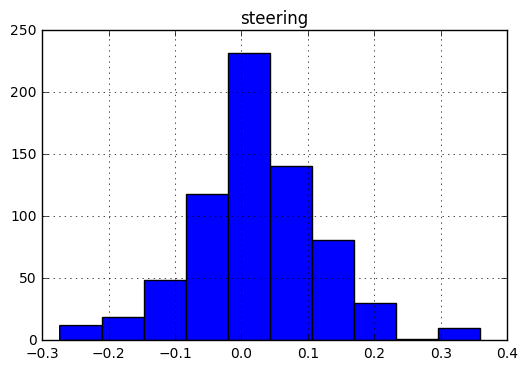

In [62]:
data_pd_cwr1 = createDataFrame('recover_laps_backwards_2/driving_log.csv')
X_train_cwr1_c, X_train_cwr1_l, X_train_cwr1_r, y_train_cwr1 = createTrainingDataPathsCenterLeftRight(data_pd_cwr1, 9, 694, 0.1)
print('length of X_train_cwr1: ', len(X_train_cwr1_c))
print('length of y_train_cwr1: ', len(y_train_cwr1))
data_pd_cwr1.hist(column = 'steering')

#### Create data from /annie_recovery (cw)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc42574ca58>]], dtype=object)

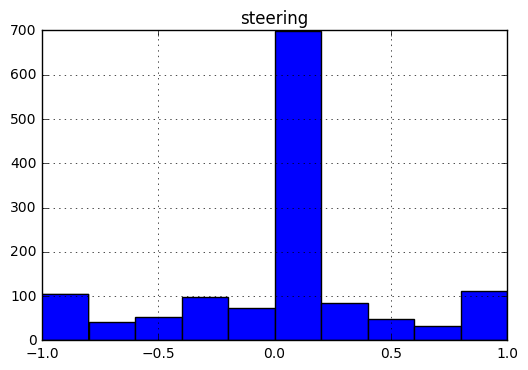

In [61]:
data_pd_cwr2 = createDataFrame('annie_recovery/driving_log_recovery.csv')
data_pd_cwr2.hist(column = 'steering')

In [37]:
X_train_cwr2_c, X_train_cwr2_l, X_train_cwr2_r, y_train_cwr2 = createTrainingDataPathsCenterLeftRightPrefix(data_pd_cwr2, 1, 1348, 0.1, 'annie_recovery/')
print('length of X_train_cwr2: ', len(X_train_cwr2_c))
print('length of y_train_cwr2: ', len(y_train_cwr2))

length of X_train_cwr2:  1346
length of y_train_cwr2:  4038


#### Create data from /data (udacity) (cw)

length of X_train_cw2:  7986
length of y_train_cw2:  23958


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc42579b9b0>]], dtype=object)

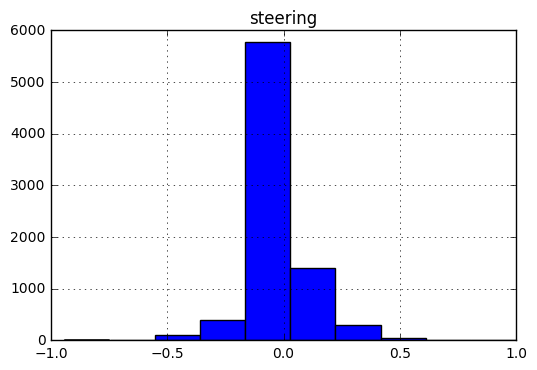

In [63]:
data_pd_cw2 = createDataFrame('data/driving_log.csv')
X_train_cw2_c, X_train_cw2_l, X_train_cw2_r, y_train_cw2 = createTrainingDataPathsCenterLeftRightPrefix(data_pd_cw2, 50, 8036,0.1, 'data/')
print('length of X_train_cw2: ', len(X_train_cw2_c))
print('length of y_train_cw2: ', len(y_train_cw2))
data_pd_cw2.hist(column = 'steering')

#### Convert to numpy arrays

In [50]:
# X_train = X_train_cw1 + X_train_ccw1 + X_train_ccwr1 + X_train_ccwr2 + X_train_cwr1
# y_train = y_train_cw1 + y_train_ccw1 + y_train_ccwr2 + y_train_ccwr2 + y_train_cwr1

#Centers
X_train_c = np.append(X_train_cw1_c, X_train_ccw1_c, axis = 0)
X_train_c = np.append(X_train_c, X_train_ccwr1_c, axis = 0)
X_train_c = np.append(X_train_c, X_train_ccwr2_c, axis = 0)
X_train_c = np.append(X_train_c, X_train_cwr1_c, axis = 0)
X_train_c = np.append(X_train_c, X_train_cwr2_c, axis = 0)
X_train_c = np.append(X_train_c, X_train_cw2_c, axis = 0)

# Lefts
X_train_l = np.append(X_train_cw1_l, X_train_ccw1_l, axis = 0)
X_train_l = np.append(X_train_l, X_train_ccwr1_l, axis = 0)
X_train_l = np.append(X_train_l, X_train_ccwr2_l, axis = 0)
X_train_l = np.append(X_train_l, X_train_cwr1_l, axis = 0)
X_train_l = np.append(X_train_l, X_train_cwr2_l, axis = 0)
X_train_l = np.append(X_train_l, X_train_cw2_l, axis = 0)

# Rights
X_train_r = np.append(X_train_cw1_r, X_train_ccw1_r, axis = 0)
X_train_r = np.append(X_train_r, X_train_ccwr1_r, axis = 0)
X_train_r = np.append(X_train_r, X_train_ccwr2_r, axis = 0)
X_train_r = np.append(X_train_r, X_train_cwr1_r, axis = 0)
X_train_r = np.append(X_train_r, X_train_cwr2_r, axis = 0)
X_train_r = np.append(X_train_r, X_train_cw2_r, axis = 0)

print('X_train_c shape: ', X_train_c.shape)
print('X_train_l shape: ', X_train_l.shape)
print('X_train_r shape: ', X_train_r.shape)

X_train = np.append(X_train_c, X_train_l, axis = 0)
X_train = np.append(X_train, X_train_r, axis = 0)

# print('X_train type: ', X_train.dtype)
# X_train_added = np.append(X_train_set_A, X_train_set_B, axis = 0) # dont forget to specify axis = 0


X_train_c shape:  (16790,)
X_train_l shape:  (16790,)
X_train_r shape:  (16790,)


In [51]:
y_train = np.append(y_train_cw1, y_train_ccw1, axis = 0)
y_train = np.append(y_train, y_train_ccwr1, axis = 0)
y_train = np.append(y_train, y_train_ccwr2, axis = 0)
y_train = np.append(y_train, y_train_cwr1, axis = 0)
y_train = np.append(y_train, y_train_cwr2, axis = 0)
y_train = np.append(y_train, y_train_cw2, axis = 0)

In [52]:
print('y_train shape: ', len(y_train))
print('X train shape total: ', X_train_c.shape[0] + X_train_l.shape[0] + X_train_r.shape[0])
print('X_train : ', X_train.shape)

y_train shape:  50370
X train shape total:  50370
X_train :  (50370,)


-0.0660377


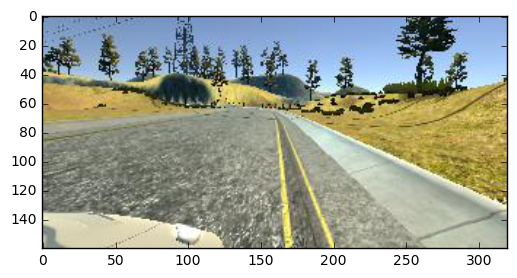

In [49]:
img = mpimg.imread(X_train_ccwr2_r[300])
print(y_train_ccwr2[300])
plt.imshow(img)

#### Save training data to pickle file

In [53]:
training_data = {
    'image': X_train,
    'steer': y_train
    }
with open('training_data_clr.p', 'wb') as handle:
    pickle.dump(training_data, handle, protocol=pickle.HIGHEST_PROTOCOL)